# Multiclass Image Classification using CNN (CIFAR-10 Example)


In [1]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Flatten labels
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Class names
class_names = ['airplane', 'car', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 36s 0us/step


In [3]:

# Build CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10 classes


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:

# Train model
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.3594 - loss: 1.7220 - val_accuracy: 0.5348 - val_loss: 1.2619
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5769 - loss: 1.1894 - val_accuracy: 0.6187 - val_loss: 1.0783
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.6445 - loss: 1.0129 - val_accuracy: 0.6636 - val_loss: 0.9456
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.6853 - loss: 0.8953 - val_accuracy: 0.6874 - val_loss: 0.9038
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7168 - loss: 0.8128 - val_accuracy: 0.6847 - val_loss: 0.8978
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7369 - loss: 0.7522 - val_accuracy: 0.7002 - val_loss: 0.8814
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7558 - loss: 0.6973 - val_accuracy: 0.7150 - val_loss: 0.8159
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7735 - loss

In [6]:

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")


313/313 - 1s - 4ms/step - accuracy: 0.7253 - loss: 0.8391

Test accuracy: 0.73


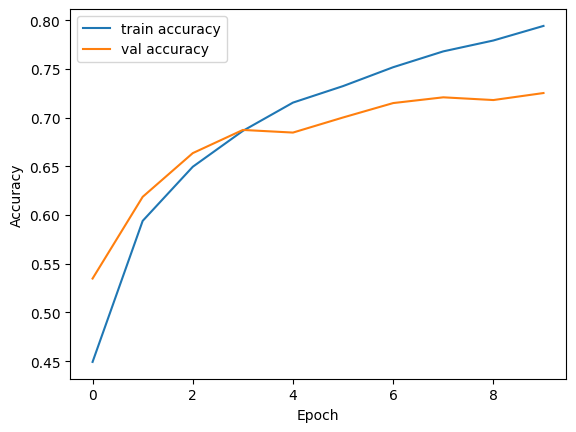

In [7]:

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


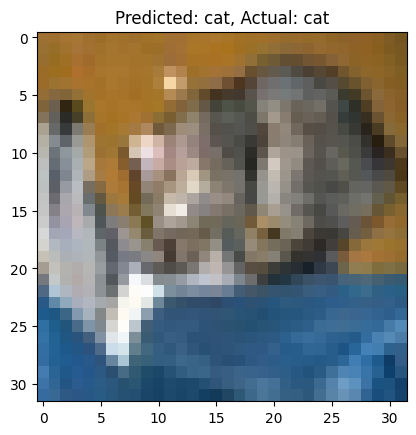

In [8]:

# Make prediction on one image
index = 0
plt.imshow(X_test[index])
predicted_class = class_names[np.argmax(model.predict(X_test[index:index+1]))]
plt.title(f"Predicted: {predicted_class}, Actual: {class_names[y_test[index]]}")
plt.show()
